In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt

# Import Data File

In [2]:
# Import data file
county_data_df = pd.read_csv("complete_county_data.csv")

county_data_df.head()

,fips_code,est_hesitant,est_strongly_hesitant,svi,svi_category,cvac,cvac_category,percent_hispanic,percent_american_indian_alaska_native,percent_asian,...,Unemployment,percentage20_Donald_Trump,percentage20_Joe_Biden,county_y,state_y,population,density,hesitancy,population_scaled,Winning_candidate_2020
0,1001,0.22,0.10,0.44,Moderate Vulnerability,0.61,High Vulnerability,0.0283,0.0025,0.0103,...,5.2,0.715,0.270,Autauga County,AL,55514,urban,moderate hesitancy,5.5514,Trump
1,1003,0.20,0.10,0.22,Low Vulnerability,0.23,Low Vulnerability,0.0456,0.0065,0.0092,...,5.5,0.762,0.223,Baldwin County,AL,190790,urban,moderate hesitancy,19.0790,Trump
2,1005,0.23,0.11,1.00,Very High Vulnerability,0.89,Very High Vulnerability,0.0436,0.0029,0.0048,...,12.4,0.536,0.456,Barbour County,AL,27201,rural,moderate hesitancy,2.7201,Trump
3,1007,0.24,0.12,0.60,High Vulnerability,0.76,High Vulnerability,0.0257,0.0013,0.0012,...,8.2,0.784,0.207,Bibb County,AL,22597,urban,moderate hesitancy,2.2597,Trump
4,1009,0.23,0.11,0.42,Moderate Vulnerability,0.80,High Vulnerability,0.0926,0.0007,0.0037,...,4.9,0.896,0.096,Blount County,AL,57826,urban,moderate hesitancy,5.7826,Trump


In [3]:
# Filter data
filtered_county_data_df = county_data_df.drop(columns={"svi_category", "cvac", "cvac_category", "svi", "est_strongly_hesitant", "est_hesitant", "geographical_point", "state_code", "county_boundary", "state_boundary", "State", "County"})
filtered_county_data_df.head()

,fips_code,percent_hispanic,percent_american_indian_alaska_native,percent_asian,percent_black,percent_hawaiian_pacific,percent_white,TotalPop,Men,Women,...,Unemployment,percentage20_Donald_Trump,percentage20_Joe_Biden,county_y,state_y,population,density,hesitancy,population_scaled,Winning_candidate_2020
0,1001,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,55036,26899,28137,...,5.2,0.715,0.270,Autauga County,AL,55514,urban,moderate hesitancy,5.5514,Trump
1,1003,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,203360,99527,103833,...,5.5,0.762,0.223,Baldwin County,AL,190790,urban,moderate hesitancy,19.0790,Trump
2,1005,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,26201,13976,12225,...,12.4,0.536,0.456,Barbour County,AL,27201,rural,moderate hesitancy,2.7201,Trump
3,1007,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,22580,12251,10329,...,8.2,0.784,0.207,Bibb County,AL,22597,urban,moderate hesitancy,2.2597,Trump
4,1009,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,57667,28490,29177,...,4.9,0.896,0.096,Blount County,AL,57826,urban,moderate hesitancy,5.7826,Trump


# Split the Data into Training Testing

In [4]:
# Choose Independent variables
X = county_data_df[["percent_white","percent_hispanic", "percent_american_indian_alaska_native",
                        "percent_asian", "percent_black", "percent_hawaiian_pacific", "Poverty", 
                        "ChildPoverty", "Drive","Carpool", "Transit", "Walk", "OtherTransp",
                        "WorkAtHome", "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork", "Unemployment", 
                        "percentage20_Donald_Trump", "percentage20_Joe_Biden", "population_scaled"]]

# Create our target
y = county_data_df['hesitancy']

X.describe()

,percent_white,percent_hispanic,percent_american_indian_alaska_native,percent_asian,percent_black,percent_hawaiian_pacific,Poverty,ChildPoverty,Drive,Carpool,...,OtherTransp,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,percentage20_Donald_Trump,percentage20_Joe_Biden,population_scaled
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,...,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,0.765595,0.094774,0.015703,0.013121,0.089487,0.000797,16.016878,22.153821,79.857333,9.895642,...,1.521854,4.798081,75.203187,16.743545,7.771089,0.283447,6.326407,0.653608,0.329154,9.977227
std,0.199056,0.139029,0.065532,0.026105,0.144267,0.003888,6.547258,10.308046,6.661486,2.901009,...,1.141899,3.088986,7.343466,5.963499,3.875747,0.453048,2.992911,0.159027,0.157901,32.134315
min,0.006900,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,6.000000,0.000000,...,0.000000,0.000000,31.100000,4.400000,0.000000,0.000000,0.000000,0.088000,0.031000,0.007100
25%,0.648300,0.022200,0.001200,0.002800,0.006450,0.000000,11.400000,14.900000,77.400000,8.100000,...,0.800000,2.900000,71.800000,12.600000,5.200000,0.100000,4.400000,0.565000,0.208000,1.115350
50%,0.838500,0.042400,0.002800,0.006100,0.022000,0.000100,15.200000,21.200000,81.000000,9.500000,...,1.300000,4.100000,76.300000,15.700000,6.800000,0.200000,6.000000,0.686000,0.297000,2.581500
75%,0.925200,0.097950,0.006600,0.012600,0.099450,0.000600,19.450000,27.800000,84.000000,11.300000,...,1.900000,5.800000,80.300000,19.400000,9.200000,0.300000,7.800000,0.775500,0.418000,6.660800
max,1.000000,0.991700,0.901900,0.417300,0.872300,0.110800,52.000000,76.500000,97.200000,29.300000,...,13.800000,33.000000,88.800000,64.800000,38.000000,8.000000,28.700000,0.962000,0.896000,996.278900


In [5]:
from sklearn.model_selection import train_test_split

# Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on training data
#norm = MinMaxScaler().fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

print(Counter(y_train))
print(Counter(y_test))

Counter({'moderate hesitancy': 1641, 'low hesitancy': 380, 'high hesitancy': 285})
Counter({'moderate hesitancy': 558, 'low hesitancy': 119, 'high hesitancy': 92})


# Logistic Regression Model

In [6]:
# Import regression model
from sklearn.linear_model import LogisticRegression

# Instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='saga', random_state=1)

# Fit the model with data
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print(y_pred.shape)

(769,)


In [7]:
# Print coefficients
print(logreg.coef_)

[[-1.46116916 -2.71613215  2.3557057  -0.82048813  3.44350512  0.12201343
   2.40099358  0.21221037 -0.25618851 -0.03447955 -0.20576052  1.06750116
   0.36998106 -0.48515967 -0.7451212  -0.04763786  1.04031555  0.82378446
  -0.78715138  2.08258652 -2.66222262 -0.37468956]
 [ 0.85540673  1.27813883 -0.72966382  1.87757294 -3.0443312   0.5887336
  -3.24053367 -0.83468015 -0.53588843  0.14563458  1.06780697 -1.43757283
  -0.52564742  1.26891504 -0.0067022   0.6164534  -0.81629471 -0.82744478
  -0.06506592 -2.92425815  2.61269498  0.03250821]
 [ 0.60576242  1.43799332 -1.62604188 -1.05708482 -0.39917392 -0.71074703
   0.83954008  0.62246978  0.79207693 -0.11115503 -0.86204645  0.37007167
   0.15566636 -0.78375537  0.7518234  -0.56881553 -0.22402084  0.00366031
   0.8522173   0.84167163  0.04952764  0.34218135]]


In [8]:
# Print intercept values
print(logreg.intercept_)

[-0.26469261  1.3820545  -1.11736189]


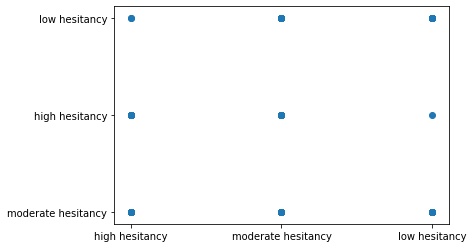

In [9]:
# Test model with predictions
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred)

In [10]:
# Import the metrics class
from sklearn import metrics
cnf1 = metrics.confusion_matrix(y_test, y_pred, labels=["low hesitancy", "moderate hesitancy", "high hesitancy"])
cnf1

array([[ 46,  72,   1],
       [ 13, 530,  15],
       [  2,  72,  18]], dtype=int64)

In [11]:
# Import the metrics class
from sklearn import metrics
cnf1 = metrics.confusion_matrix(y_test, y_pred, labels=["low hesitancy", "moderate hesitancy", "high hesitancy"])
cnf1

array([[ 46,  72,   1],
       [ 13, 530,  15],
       [  2,  72,  18]], dtype=int64)

In [12]:
# Create a DataFrame from the confusion matrix.
cnf1_df = pd.DataFrame(
    cnf1, index=["Actual Low", "Actual Medium", "Actual High"], columns=["Predicted Low", "Predicted Medium", "Predicted High"])

cnf1_df

,Predicted Low,Predicted Medium,Predicted High
Actual Low,46,72,1
Actual Medium,13,530,15
Actual High,2,72,18


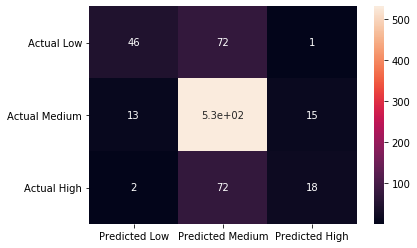

In [13]:
import seaborn as sns

# Create a heatmap of the confusion matrix
ax = sns.heatmap(cnf1_df, annot=True)

In [14]:
# Print accuracy, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,
                                          average='micro'))

print("Recall:",metrics.recall_score(y_test, y_pred, 
                                     average='micro'))

Accuracy: 0.7724317295188556
Precision: 0.7724317295188556
Recall: 0.7724317295188556


In [15]:
# Print classification report
from imblearn.metrics import classification_report_imbalanced
print(metrics.classification_report(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

                    precision    recall  f1-score   support

    high hesitancy       0.53      0.20      0.29        92
     low hesitancy       0.75      0.39      0.51       119
moderate hesitancy       0.79      0.95      0.86       558

          accuracy                           0.77       769
         macro avg       0.69      0.51      0.55       769
      weighted avg       0.75      0.77      0.74       769

                          pre       rec       spe        f1       geo       iba       sup

    high hesitancy       0.53      0.20      0.98      0.29      0.44      0.18        92
     low hesitancy       0.75      0.39      0.98      0.51      0.61      0.36       119
moderate hesitancy       0.79      0.95      0.32      0.86      0.55      0.32       558

       avg / total       0.75      0.77      0.50      0.74      0.55      0.31       769



In [16]:
np.round(logreg.coef_,decimals=2) > 0
X.columns

Index(['percent_white', 'percent_hispanic',
       'percent_american_indian_alaska_native', 'percent_asian',
       'percent_black', 'percent_hawaiian_pacific', 'Poverty', 'ChildPoverty',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'percentage20_Donald_Trump', 'percentage20_Joe_Biden',
       'population_scaled'],
      dtype='object')

In [17]:
from sklearn.feature_selection import RFE
predictors = X_train_scaled
selector = RFE(logreg, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)
order = selector.ranking_
print(order)
feature_ranks = []
for index, ranking in enumerate(order):
  feature_ranks.append(f"{ranking}. {X.columns[index]}")
  #print(f"{ranking}. {X.columns[index]}")

feature_ranks

[10  9  4  6  3 18  1 16 17 22 12  7 20  8 13 19 11 14 15  5  2 21]


['10. percent_white',
 '9. percent_hispanic',
 '4. percent_american_indian_alaska_native',
 '6. percent_asian',
 '3. percent_black',
 '18. percent_hawaiian_pacific',
 '1. Poverty',
 '16. ChildPoverty',
 '17. Drive',
 '22. Carpool',
 '12. Transit',
 '7. Walk',
 '20. OtherTransp',
 '8. WorkAtHome',
 '13. PrivateWork',
 '19. PublicWork',
 '11. SelfEmployed',
 '14. FamilyWork',
 '15. Unemployment',
 '5. percentage20_Donald_Trump',
 '2. percentage20_Joe_Biden',
 '21. population_scaled']

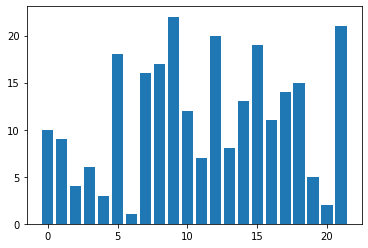

In [18]:
plt.bar([x for x in range(len(order))], order)
plt.show()

In [19]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1.46117
Feature: 1, Score: -2.71613
Feature: 2, Score: 2.35571
Feature: 3, Score: -0.82049
Feature: 4, Score: 3.44351
Feature: 5, Score: 0.12201
Feature: 6, Score: 2.40099
Feature: 7, Score: 0.21221
Feature: 8, Score: -0.25619
Feature: 9, Score: -0.03448
Feature: 10, Score: -0.20576
Feature: 11, Score: 1.06750
Feature: 12, Score: 0.36998
Feature: 13, Score: -0.48516
Feature: 14, Score: -0.74512
Feature: 15, Score: -0.04764
Feature: 16, Score: 1.04032
Feature: 17, Score: 0.82378
Feature: 18, Score: -0.78715
Feature: 19, Score: 2.08259
Feature: 20, Score: -2.66222
Feature: 21, Score: -0.37469


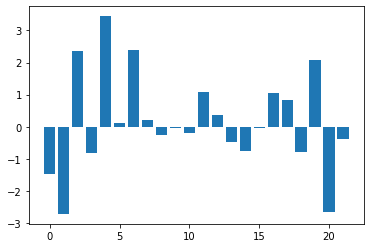

In [20]:
from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
# Create dataframe for features
features_df = pd.DataFrame.from_dict(importance)
features_df.reset_index(drop=True, inplace=True)

features_df

,0
0,-1.461169
1,-2.716132
2,2.355706
3,-0.820488
4,3.443505
5,0.122013
6,2.400994
7,0.212210
8,-0.256189
9,-0.034480
